| **CLASSIFICATION OF SPINAL CONDITIONS** |
|-----------------------------------------|
---


> **Description:**  
> Naive Bayes classifier will be used to create a model that can tell spinal conditions apart, helping improve diagnosis and treatment for spinal disorders.

---

**Name:** Ayesha Siddiqua  
**Student ID:** U22103855


### INTRODUCTION

#### The dataset contains:
***310 instances** and **6 features** related to spinal health.* 

#### Features
1. *Pelvic Incidence*
2. *Pelvic Tilt*
3. *Lumbar Lordosis Angle*
4. *Sacral Slope*
5. *Pelvic Radius*
6. *Degree of Spondylolisthesis*
   
#### Spinal Condition Categories
1. *Normal (NO)* - Patients without any spinal issues.
2. *Disk Hernia (DH)* - Patients with a herniated disc.
3. *Spondylolisthesis (SL)* - Patients with vertebrae that have slipped.

In [6]:
# importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### **1. Data Preprocessing**

**Loading the Dataset**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset

# read the file into a dataframe 
df = pd.read_csv('vertebral_column.csv')

# display the dataframe to check if it was loaded correctly
print(df.head())


   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic_radius  degree_spondylolisthesis spinal_condition  
0          98.67                     -0.25               DH  
1         114.41                      4.56               DH  
2         105.99                     -3.53               DH  
3         101.87                     11.21               DH  
4         108.17                      7.92               DH  


**Handling Missing Values**

In [11]:
# check for missing values in the dataframe
missing_values = df.isnull().sum()

# display the count of missing values for each column
print(missing_values)

# check if there are any missing values
if missing_values.sum() == 0:
    print("\nNo missing values.")
else:
    print("\nMissing values found.")


pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
spinal_condition            0
dtype: int64

No missing values.


**Data Preprocessing**

In [13]:
# FEATURES & TARGETS COLUMNS

features = df.columns[:-1]  
target = df.columns[-1]     

# Data preprocessing
x = df.iloc[:, :-1].values # feature values
y = df.iloc[:, -1].values # target values

**Label Encoding**

In [15]:
# Convert categorical labels to numerical values using label encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# TARGET LABELS: Disk Hernia -> 0, Normal -> 1, Spondylolisthesis -> 2.
y = le.fit_transform(y)

**Normalization/Scaling & Train-Test Split**

In [17]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Feature scaling 
# This ensures equal weight for each feature and improves model performance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


**Feature selection using Recursive Feature Elimination (RFE) with SVM classifier**

In [38]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Print the names of features before RFE
print("Features before RFE:")
for feature in features:
    print(feature)

# Feature selection using Recursive Feature Elimination (RFE) with SVM classifier
svm = SVC(kernel="linear")
rfe_selector = RFE(estimator=svm, n_features_to_select=6, step=1) #choosing 6 features as it gives highest accuracy
X_train_rfe = rfe_selector.fit_transform(x_train, y_train)
X_test_rfe = rfe_selector.transform(x_test)

# Train the SVM classifier on the selected features
svm.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_rfe)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy with selected features:\n", accuracy)

# Get the selected feature indices
selected_feature_indices = rfe_selector.support_

# Get the names of selected features
selected_feature_names = features[selected_feature_indices]

print("\nSelected Features after RFE:")
for feature in selected_feature_names:
    print(feature)

Features before RFE:
pelvic_incidence
pelvic_tilt
lumbar_lordosis_angle
sacral_slope
pelvic_radius
degree_spondylolisthesis

Accuracy with selected features:
 0.8076923076923077

Selected Features after RFE:
pelvic_incidence
pelvic_tilt
lumbar_lordosis_angle
sacral_slope
pelvic_radius
degree_spondylolisthesis


### **2. Model Training**

**Model Building and Training Model**

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Initialize the Gaussian Naive Bayes model
model = GaussianNB()

# cross-validation with StratifiedKFold for balanced class splits in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation with accuracy as the scoring metric
cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')

# print cross-validation scores and the mean score
print("Cross-Validation Scores:", cv_scores)
mean_cv_accuracy = np.mean(cv_scores)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Train the model on the full training set for later use in prediction
model.fit(x_train, y_train)


Cross-Validation Scores: [0.82978723 0.80851064 0.93478261 0.86956522 0.7826087 ]
Mean Cross-Validation Accuracy: 0.8450508788159112


GaussianNB()

### **3. Model Evaluation**

We will use accuracy and F1 score to determine model performance.

In [23]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    recall_score,
    precision_score
)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) * 100 
print(f'Accuracy of the model is equal to {round(accuracy, 2)} %.')

Accuracy of the model is equal to 79.49 %.


In [24]:
# confusion matrix to summarize the classification results        
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", CM)

# F1 score
F1 = f1_score(y_test, y_pred, average='weighted')  
print(f"F1 Score: {F1:.4f}")
        
# Recall measures the ability of the model to identify positive instances       
recall = recall_score(y_test, y_pred, average='weighted')    
print(f"Recall: {recall:.4f}")

# Precision measures the accuracy of positive predictions
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

Confusion Matrix:
 [[ 8  6  1]
 [ 5 15  4]
 [ 0  0 39]]
F1 Score: 0.7849
Recall: 0.7949
Precision: 0.7813


### **4. Confusion Matrix Visualisation**

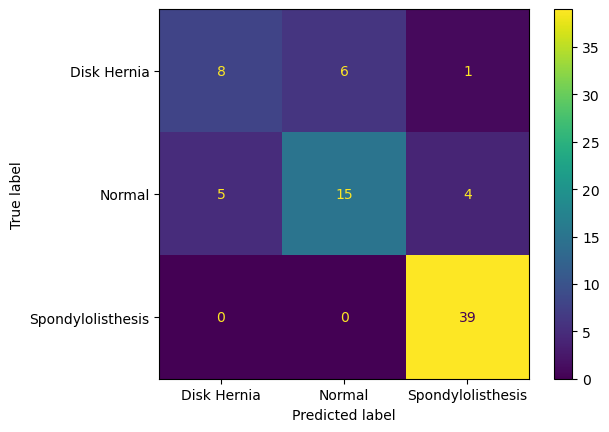

In [25]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
labels = ["Disk Hernia", "Normal", "Spondylolisthesis"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Due to the imbalanced nature of the data, we can see that the confusion matrix tells a different story. On a minority target: `Disk Hernia` and `Normal`, we have more mislabeled. 